In [16]:
import torch
import torch.nn as nn
from d2l import torch as d2l
import torch.nn.functional as F

In [17]:
class my_linear(nn.Module):

    def __init__(self, in_feaures, out_feaures):
        super(my_linear, self).__init__()
        self.weight = nn.Parameter(
            torch.randn(in_feaures, out_feaures)
        )
        self.bias = nn.Parameter(
            torch.randn(out_feaures)
        )

    def forward(self, x):
        res = x @ self.weight + self.bias
        return res

def softmax(x):
    """
    x.shape = (N, C)
    减去最大值可以防止 inf 的出现
    """
    # x_max, _ = x.max(dim=1, keepdim=True)
    # x -= x_max
    x_exp = torch.exp(x)
    return x_exp / x_exp.sum(dim=1, keepdim=True)

class simple_net(nn.Module):

    def __init__(self):
        super(simple_net, self).__init__()
        self.linear1 = my_linear(784, 256)
        self.linear2 = my_linear(256, 10)

    def forward(self, x):
        return self.linear2(F.relu(self.linear1(x.reshape(-1, 784))))

def cross_entropy(y_hat, y):
    # 学一学！！
    """
    :param y_hat: y_hat.shape = (N, C)   y_hat为softmax的输出
    :param y:     y.shape = (N,)         y为真实标签的序列
    """
    return -1 * torch.log(y_hat[range(len(y_hat)), y]).sum()

AssertionError: 0.9125004199028015

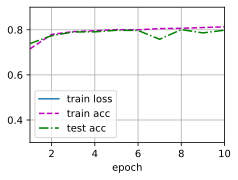

In [18]:
if __name__ == '__main__':
    batch_size, lr, num_epoch = 64, 0.02, 10
    mnist_train, mnist_test = d2l.load_data_fashion_mnist(batch_size)
    print(mnist_test, mnist_train)
    loss_fn = nn.CrossEntropyLoss()
    net = simple_net()
    optimizer = torch.optim.SGD(net.parameters(), lr)
    d2l.train_ch3(net, mnist_train, mnist_test, loss_fn, num_epoch, optimizer)